# **SigefScraper**


**Objetivo**: A partir de uma relação de códigos de parcelas de imóveis certificados no Sigef (Sistema de Gestão Fundiária do Incra), coletar o nome e o cpf/cnpj dos detentores daquela área.

## **Problema 1: não tenho os links, somente o nome do imóvel e o código da parcela 😢** 

O arquivo que eu tenho é shapefile, mas a tabela de atributos, em dbf, pode ser lida no Libre Office. Abrindo o dbf, podem ser vistas informações como o nome do imóvel, código da parcela, status do registro. 

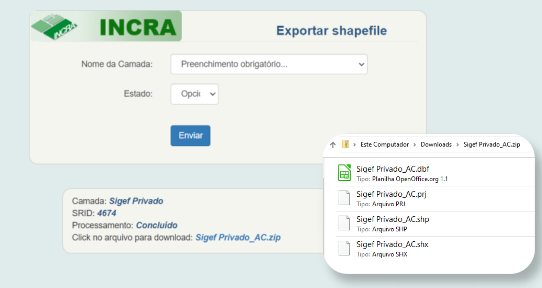


As páginas do Sigef têm um padrão. Exemplos:


**`https://sigef.incra.gov.br/geo/parcela/detalhe/ + co_parcela`**: link para os detalhes da parcela

**`https://sigef.incra.gov.br/geo/parcela/memorial/ + co_parcela`**: link para o pdf com o memorial descritivo daquela parcela

### <center>**Problema 1 → Solução: concatenar strings!**</center>

In [ ]:
#importando as bibliotecas necessárias
import csv #para abrir o arquivo csv
from urllib.request import urlopen #para lidar com os links
import ssl #para lidar com o certificado de segurança

## **Problema 2: E como eu faço para acessar os links?** 😢



In [ ]:
url = "https://sigef.incra.gov.br/geo/parcela/detalhe/8eef01b3-6431-489e-937c-5416ec4d9db3/"
resposta = urlopen(url)
html = resposta.read().decode("utf-8")

In [ ]:
#importando as bibliotecas necessárias
import csv #para abrir o arquivo csv
from urllib.request import urlopen #para lidar com os links

In [ ]:
url = "https://sigef.incra.gov.br/geo/parcela/memorial/3d5f4cf2-b865-4f3e-bfda-8ce0ed957ce4/"

In [ ]:
import ssl #para lidar com o certificado de segurança
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
import urllib.request
urllib.request.urlretrieve(url, "filename.pdf")

In [ ]:
arquivo = open("links_sigef.csv")
leitor = csv.DictReader(arquivo)  # DictReader é o iterável que devolve dicionários
for registro in leitor:
  coluna = #dividir as colunas
  url = #coluna cd_area
  resposta = urlopen(url)
  html = resposta.read().decode("utf-8")
  partes = html.split("CPF/CNPJ</th>\n        </tr>\n        </thead>\n        <tbody>\n\n        \n\n            <tr>\n                <td>")
  for parte in partes:
    subparte = parte.split("</td>\n")
    nome = subparte[0]
    documento = subparte[1]

In [ ]:
url = "https://sigef.incra.gov.br/geo/parcela/detalhe/8eef01b3-6431-489e-937c-5416ec4d9db3/" #coluna cd_area
resposta = urlopen(url)
html = resposta.read().decode("utf-8")
partes = html.split("CPF/CNPJ</th>\n        </tr>\n        </thead>\n        <tbody>\n\n        \n\n            <tr>\n                <td>")
for parte in partes:
  subparte = parte.split("</td>\n")
  nome = subparte[0]
  documento = subparte[1]

In [ ]:
print(nome)
print(documento)

**Próximos passos:**
*   Adicionar `nome` e `documento` no arquivo `links_sigef.csv`
*   Limpar a string `documento`
*   Automatizar a interseção de camadas do QGIS *(é possível ler os atributos dos shapefiles com Python?)*
*   Automatizar a criação dos links (fiz no excel; concatentei a string `https://sigef.incra.gov.br/geo/parcela/detalhe/` com a string das células na coluna `cd_parcela`)
*   Coletar outras informações (responsável técnico, baixar documentos...)